Импортируем необходимые библиотеки

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Наш датасет содерижт два файла movie.csv и credits.csv

Посмотрим содержимое первых пяти строк файла movie.csv и credits.csv

In [65]:
data_movie = pd.read_csv('movie.csv')
data_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [66]:
data_credit = pd.read_csv('credits.csv')
data_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# EDA

Проверим какие столбцы присутстствуют в в файле movie.csv

In [67]:
data_movie.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Опишем, что означает каждый столбец

* budget — Бюджет, в рамках которого был снят фильм.

* genre — Жанр фильма: боевик, комедия, триллер и т. д.

* homepage — Ссылка на официальный сайт фильма.

* id — Идентификатор фильма (совпадает с movie_id из первого набора данных).

* keywords — Ключевые слова или теги, связанные с фильмом.

* original_language — Язык, на котором изначально был снят фильм.

* original_title — Название фильма до перевода или адаптации.

* overview — Краткое описание сюжета фильма.

* popularity — Числовой показатель, отражающий популярность фильма.

* production_companies — Кинокомпании, участвовавшие в производстве фильма.

* production_countries — Страны, в которых был произведён фильм.

* release_date — Дата выхода фильма.

* revenue — Мировые кассовые сборы фильма.

* runtime — Продолжительность фильма в минутах.

* status — Статус фильма: "Вышел" или "Ожидается".

* tagline — Слоган фильма.

* title — Название фильма.

* vote_average — Средняя оценка, полученная фильмом.

* vote_count — Общее количество голосов, полученных фильмом.

Посмотрим на второй файл credits.csv

In [68]:
data_credit.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

* movie_id — Уникальный идентификатор для каждого фильма.

* cast — Имена главных и второстепенных актёров.

* crew — Имена членов съёмочной группы: режиссёра, монтажёра, композитора, сценариста и других.

Объединим два файла по ID

In [69]:
data_credit.columns = ['id','title','cast','crew']
data_all= data_movie.merge(data_credit,on='id')

Посмотрим на объеденённые данные

In [70]:
data_all.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Для задачи предсказания популярности трека столбец ID не несет никакой полезной информации, поэтому удалим его, также у нас образовались столбцы дубликаты title_x, title_y удалим один из них.

In [71]:
data = data_all.drop(['id','title_y'], axis = 1)
data.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

# Описание датасета фильмов
Размер датасета: 4803 строк (фильмов), 22 признака (столбца)

Целевая переменная: vote_average — средняя оценка фильма

# Типы признаков:
## Числовые признаки (6):
budget — бюджет фильма (целое число)

popularity — популярность (вещественное число)

revenue — доход от проката (целое число)

runtime — продолжительность фильма в минутах (вещественное число)

vote_average — средняя оценка (вещественное число, таргет)

vote_count — количество голосов (целое число)

## Категориальные признаки (8):
original_language — язык оригинальной версии

status — статус фильма ("Released", "Rumored" и т. д.)

genres — жанры (может содержать несколько жанров, закодированы в строке/JSON)

production_companies — киностудии

production_countries — страны производства

spoken_languages — языки, на которых говорят персонажи

cast — актёрский состав (строка со списком актёров)

crew — съёмочная группа (строка с ролями и именами)

## Текстовые признаки (7):
original_title — оригинальное название

title_x, title_y — дубликаты названия фильма

overview — краткое описание фильма

tagline — слоган

keywords — ключевые слова, теги

homepage — ссылка на сайт фильма

## Дата:
release_date — дата выхода фильма (в формате строки, нужно преобразовать в datetime)

## Пропуски
Столбцы с пропусками:

* homepage — много пропусков (4803 → 1712)

* overview — 3 пропуска

* release_date — 1 пропуск

* runtime — 2 пропуска

* tagline — много пропусков (3959/4803)

Что делаем:

* homepage - нужно удалить, так как нерелевантно содержит URL сайта — для модели бесполезно

* overview - заполним пустой строкой

* release_date - удалим 1 строку

* runtime - заполнить медианным значением	Малое количество пропусков, медиана устойчива к выбросам

* tagline - заполним пустой строкой как overview

In [73]:
# удаление столбца homepage
data.drop(columns='homepage', inplace=True)

# заполнение overview и tagline
data['overview'] = data['overview'].fillna('')
data['tagline'] = data['tagline'].fillna('')

# удаление строки без даты
data = data.dropna(subset=['release_date'])

# заполнение runtime медианным значением
data['runtime'] = data['runtime'].fillna(data['runtime'].median())


In [74]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000
mean,2.905109e+07,21.496776,8.227777e+07,106.896501,6.093440,690.361724
std,4.072447e+07,31.818451,1.628697e+08,22.557033,1.191496,1234.674268
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.671734,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.924931,1.917498e+07,103.000000,6.200000,235.500000
75%,4.000000e+07,28.332017,9.291920e+07,117.750000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


ДОБАВИТЬ АНАЛИЗ

In [75]:
data[['budget', 'revenue', 'runtime','popularity']].isin([0]).sum()

budget        1036
revenue       1426
runtime         34
popularity       0
dtype: int64

ДОБАВИТЬ АНАЛИЗ

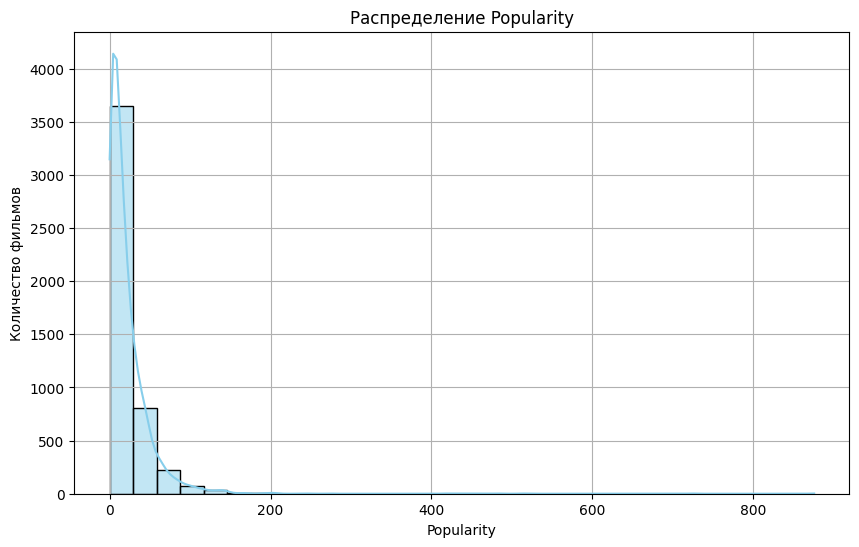

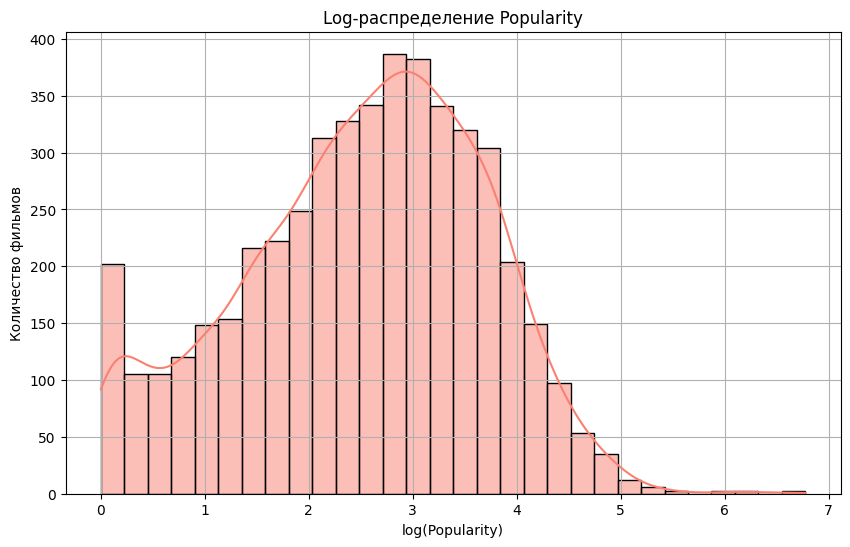

In [76]:
# Обычное распределение popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Распределение Popularity')
plt.xlabel('Popularity')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

# Логарифмическое распределение (игнорируем нули, если они есть)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['popularity']), bins=30, kde=True, color='salmon')
plt.title('Log-распределение Popularity')
plt.xlabel('log(Popularity)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

 Видим, что распределение popularity имеет выраженное смещение вправо: большинство фильмов имеют низкую популярность, а несколько выбиваются в суперхиты. Используем boxplot, чтобы лучше убедиться в этом

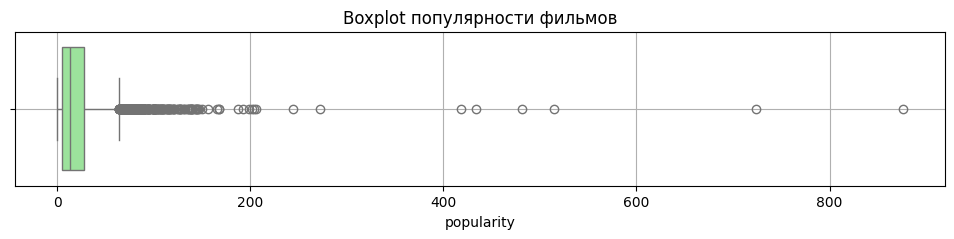

In [77]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['popularity'], color='lightgreen')
plt.title('Boxplot популярности фильмов')
plt.grid(True)
plt.show()


ОБЪЯСНЕНИЯ КОДА

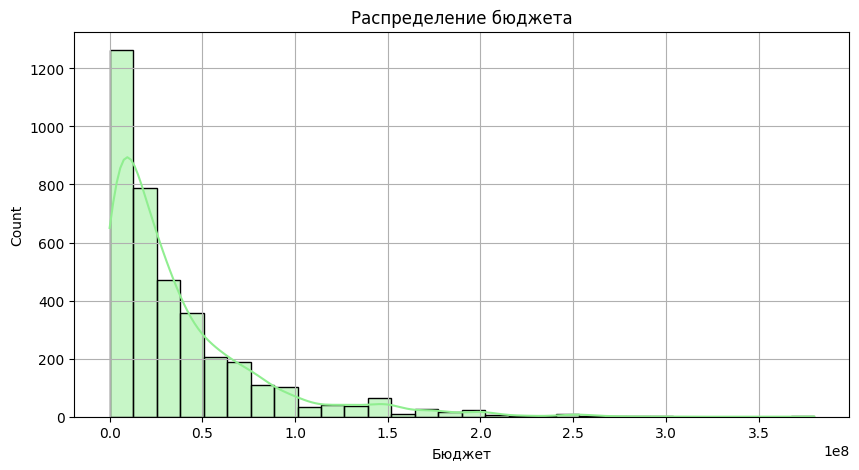

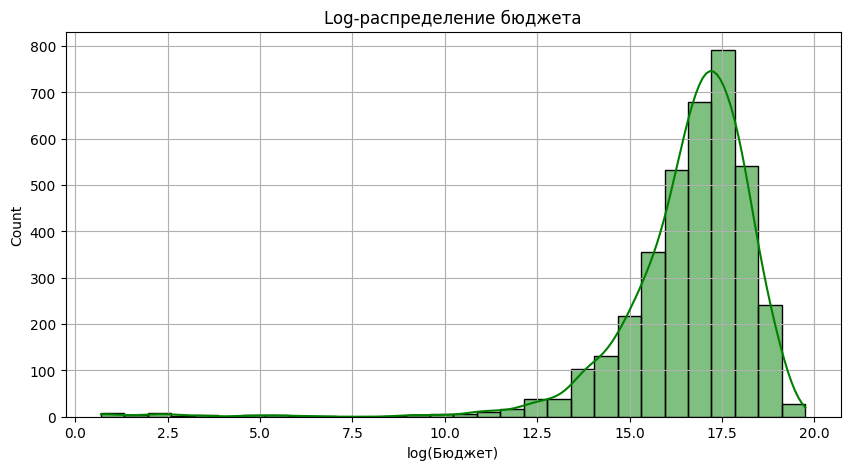

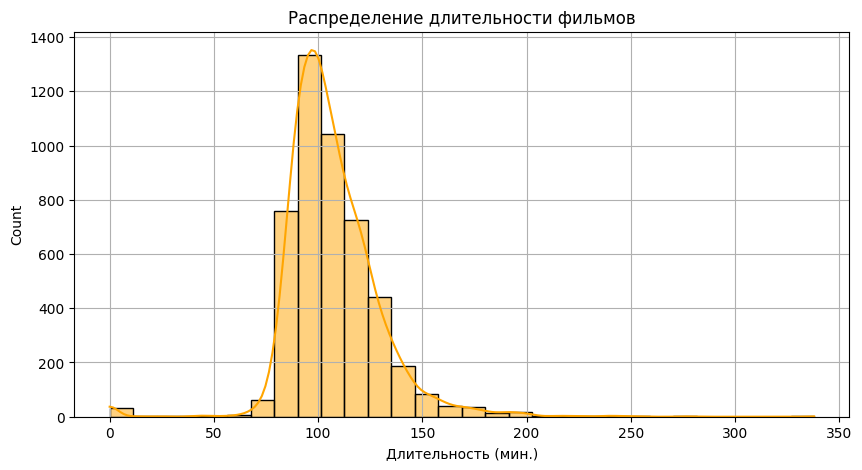

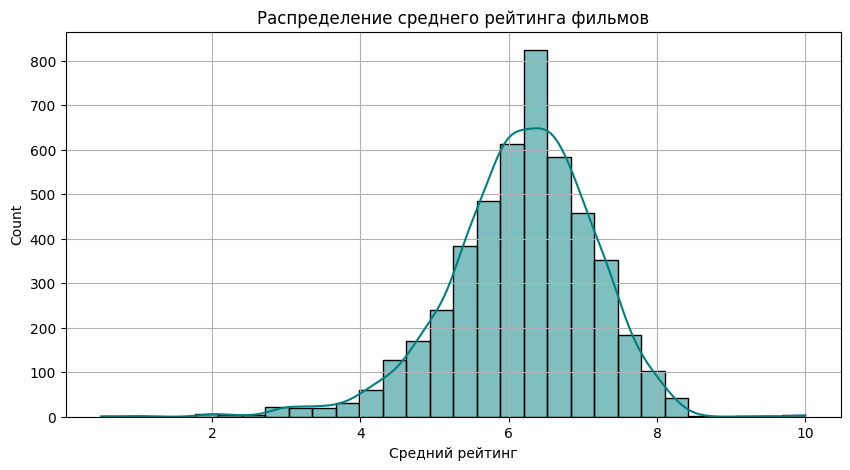

In [78]:
# Budget (исключим 0 значения)
plt.figure(figsize=(10, 5))
sns.histplot(data[data['budget'] > 0]['budget'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение бюджета')
plt.xlabel('Бюджет')
plt.grid(True)
plt.show()

# Логарифм бюджета
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(data[data['budget'] > 0]['budget']), bins=30, kde=True, color='green')
plt.title('Log-распределение бюджета')
plt.xlabel('log(Бюджет)')
plt.grid(True)
plt.show()

# Runtime
plt.figure(figsize=(10, 5))
sns.histplot(data['runtime'], bins=30, kde=True, color='orange')
plt.title('Распределение длительности фильмов')
plt.xlabel('Длительность (мин.)')
plt.grid(True)
plt.show()

# Vote Average
plt.figure(figsize=(10, 5))
sns.histplot(data[data['vote_average'] > 0]['vote_average'], bins=30, kde=True, color='teal')
plt.title('Распределение среднего рейтинга фильмов')
plt.xlabel('Средний рейтинг')
plt.grid(True)
plt.show()


ВЫВОДЫ

Построим корреляционную матрицу, чтобы посмотреть на взаимосвязь числовых признаков

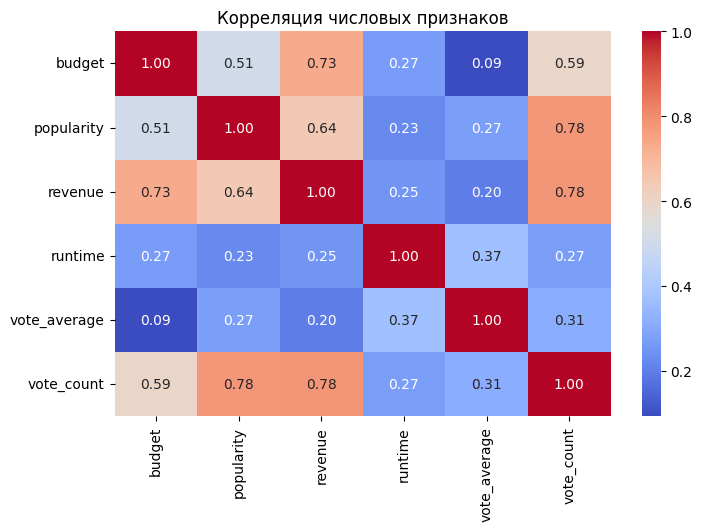

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем только числовые признаки
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Корреляционная матрица
corr = data[num_cols].corr()

# Отобразим только связи с popularity
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()


ВЫВОДЫ

ОБЪЯСНЕНИЯ КОДА

In [80]:
# Количество уникальных значений в категориальных признаках
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"{col}: {data[col].nunique()} уникальных значений")


genres: 1175 уникальных значений
keywords: 4222 уникальных значений
original_language: 37 уникальных значений
original_title: 4800 уникальных значений
overview: 4800 уникальных значений
production_companies: 3697 уникальных значений
production_countries: 469 уникальных значений
release_date: 3280 уникальных значений
spoken_languages: 544 уникальных значений
status: 3 уникальных значений
tagline: 3945 уникальных значений
title_x: 4799 уникальных значений
cast: 4761 уникальных значений
crew: 4776 уникальных значений


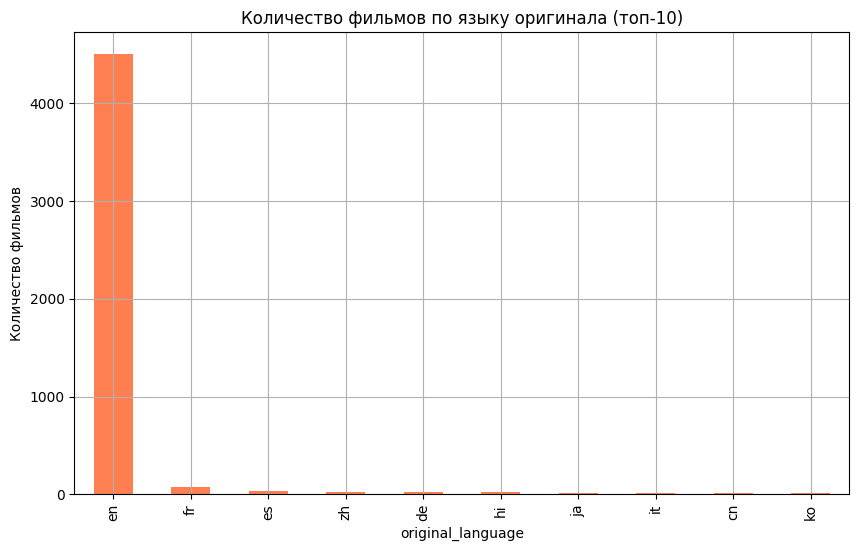

In [81]:
# Топ-10 языков по количеству фильмов
plt.figure(figsize=(10, 6))
data['original_language'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Количество фильмов по языку оригинала (топ-10)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()


ВЫВОД

Преобразуем мультиклассовый категориальный признак geners через multi-hot encoding



In [83]:
import ast

def extract_genres(text):
    try:
        genres = [d["name"] for d in ast.literal_eval(text)]
        return genres
    except:
        return []

data["genres_list"] = data["genres"].apply(extract_genres)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data["genres_list"]), columns=mlb.classes_)
data = pd.concat([data, genres_encoded], axis=1)


Text(0, 0.5, 'Жанр')

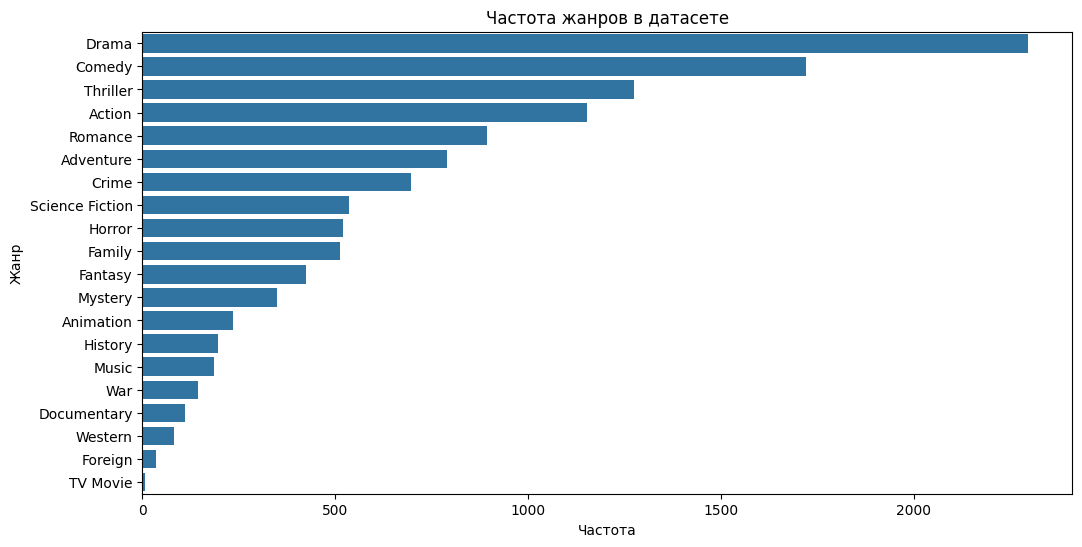

In [ ]:
all_genres = data['genres_list'].explode()
genre_counts = all_genres.value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Частота жанров в датасете')
plt.xlabel('Частота')
plt.ylabel('Жанр')


Text(0, 0.5, 'Жанр')

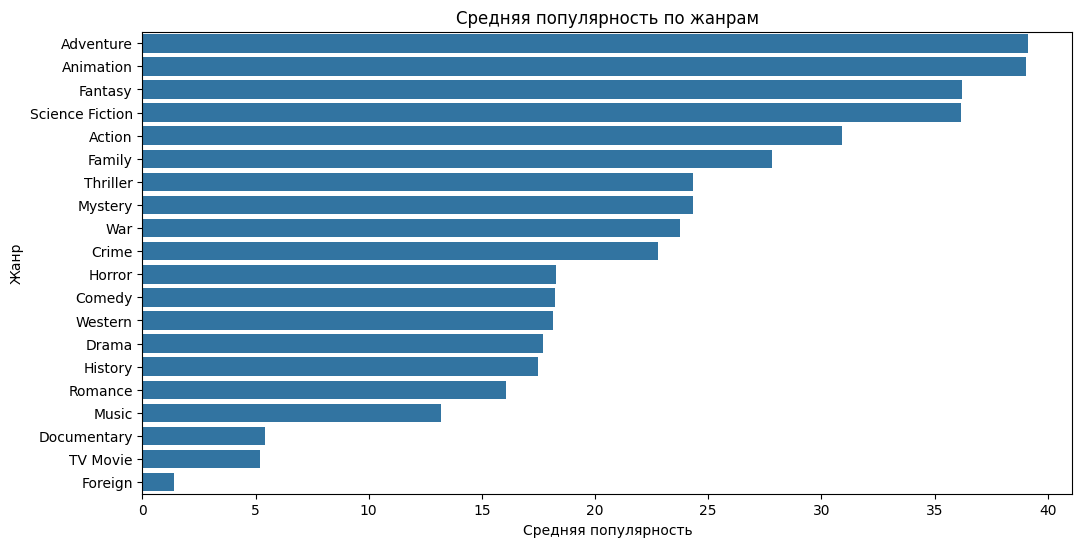

In [87]:
genre_target_means = data[genres_encoded.columns].apply(
    lambda col: data['popularity'][col == 1].mean()
).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_target_means.values, y=genre_target_means.index)
plt.title('Средняя популярность по жанрам')
plt.xlabel('Средняя популярность')
plt.ylabel('Жанр')


Text(0, 0.5, 'Жанр')

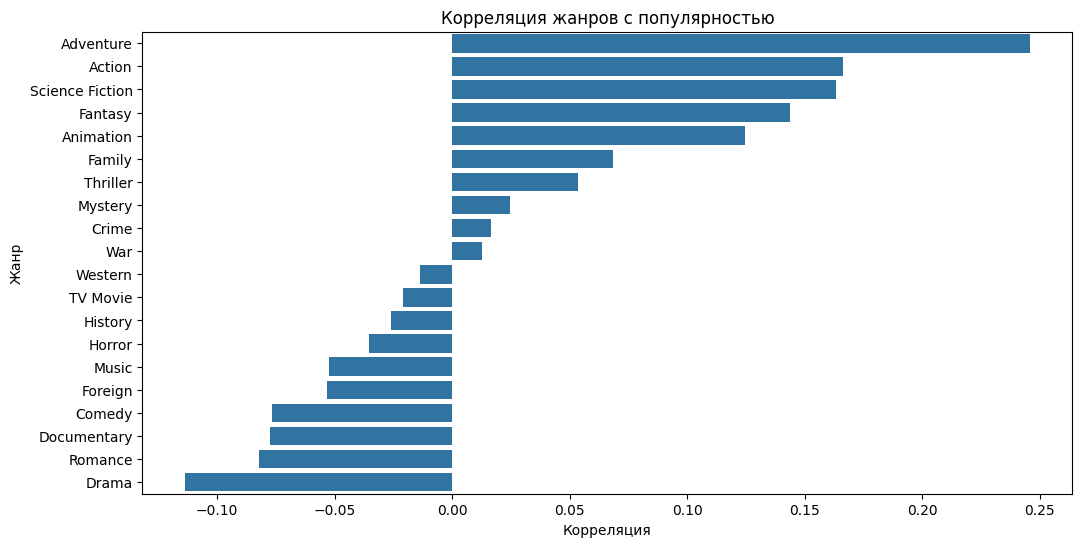

In [88]:
correlations = data[genres_encoded.columns].corrwith(data['popularity']).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Корреляция жанров с популярностью')
plt.xlabel('Корреляция')
plt.ylabel('Жанр')

Посмотрим на корреляцию популярности в зависимости от того снимался ли фильм известной компанией или в нём есть известный актер

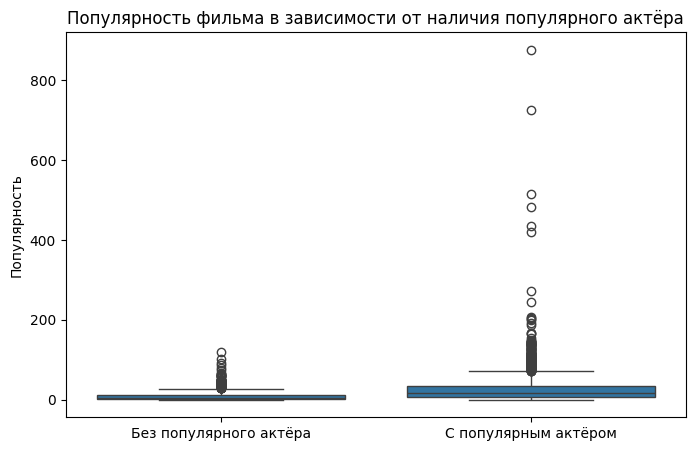

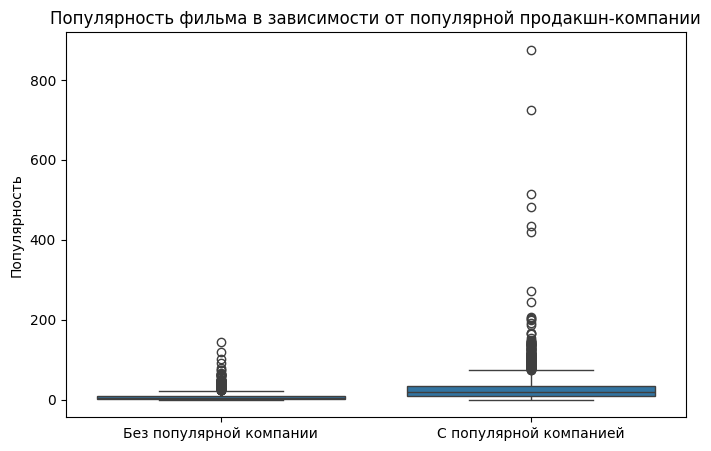

In [89]:
import pandas as pd
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- Функция для извлечения имён из JSON-подобной строки ---
def extract_names(text):
    try:
        return [d['name'] for d in ast.literal_eval(text)]
    except:
        return []

# --- Применяем к нужным столбцам ---
data["company_list"] = data["production_companies"].apply(extract_names)
data["cast_list"] = data["cast"].apply(extract_names)

# --- Собираем все имена ---
all_companies = [company for sublist in data["company_list"] for company in sublist]
all_actors = [actor for sublist in data["cast_list"] for actor in sublist]

# --- Считаем частоту появления ---
company_counts = Counter(all_companies)
actor_counts = Counter(all_actors)

# --- Задаём "популярных" по порогу ---
top_companies = set(name for name, count in company_counts.items() if count >= 10)
top_actors = set(name for name, count in actor_counts.items() if count >= 15)

# --- Временные бинарные метки для анализа ---
data["has_popular_actor"] = data["cast_list"].apply(lambda cast: any(actor in top_actors for actor in cast))
data["has_popular_company"] = data["company_list"].apply(lambda companies: any(c in top_companies for c in companies))

# --- Визуализация: наличие популярного актёра vs популярность ---
plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_actor", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярного актёра', 'С популярным актёром'])
plt.title("Популярность фильма в зависимости от наличия популярного актёра")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()

# --- Визуализация: наличие популярной компании vs популярность ---
plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_company", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярной компании', 'С популярной компанией'])
plt.title("Популярность фильма в зависимости от популярной продакшн-компании")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()


ВЫВОД К ГРАФИКУ

Посмтрим как изменяеться популярность фильма в зависимсоти от его длительности

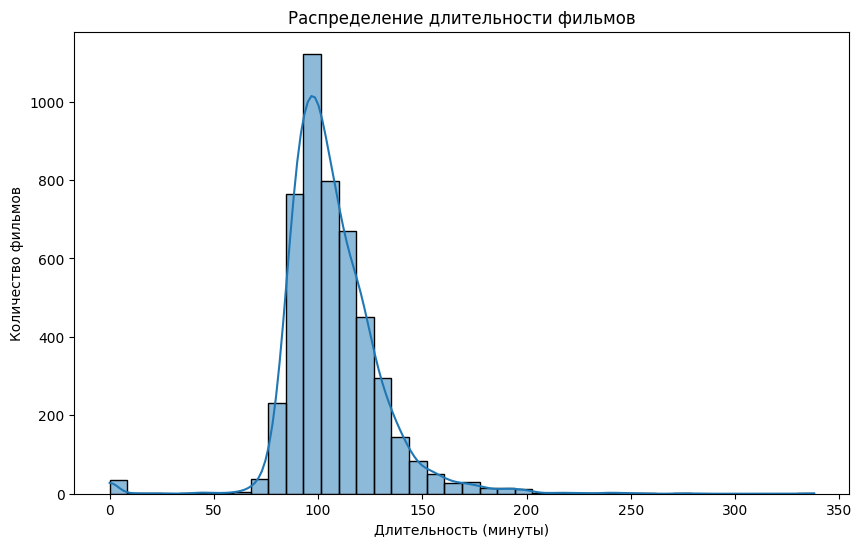

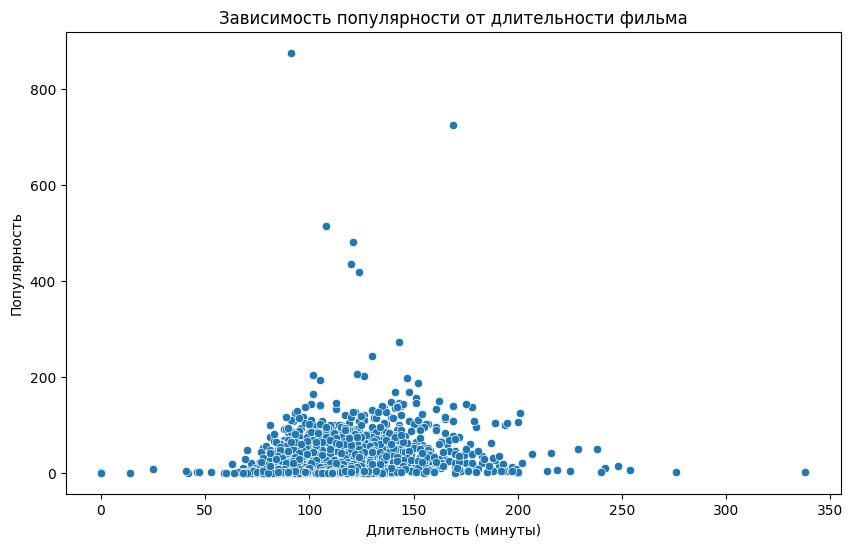

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data['runtime'].dropna(), bins=40, kde=True)
plt.title('Распределение длительности фильмов')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Количество фильмов')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data.dropna(subset=['runtime', 'popularity']),
    x='runtime', y='popularity'
)
plt.title('Зависимость популярности от длительности фильма')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Популярность')
plt.show()





ВЫВОД!

Составим объединенную матрицу кореляции

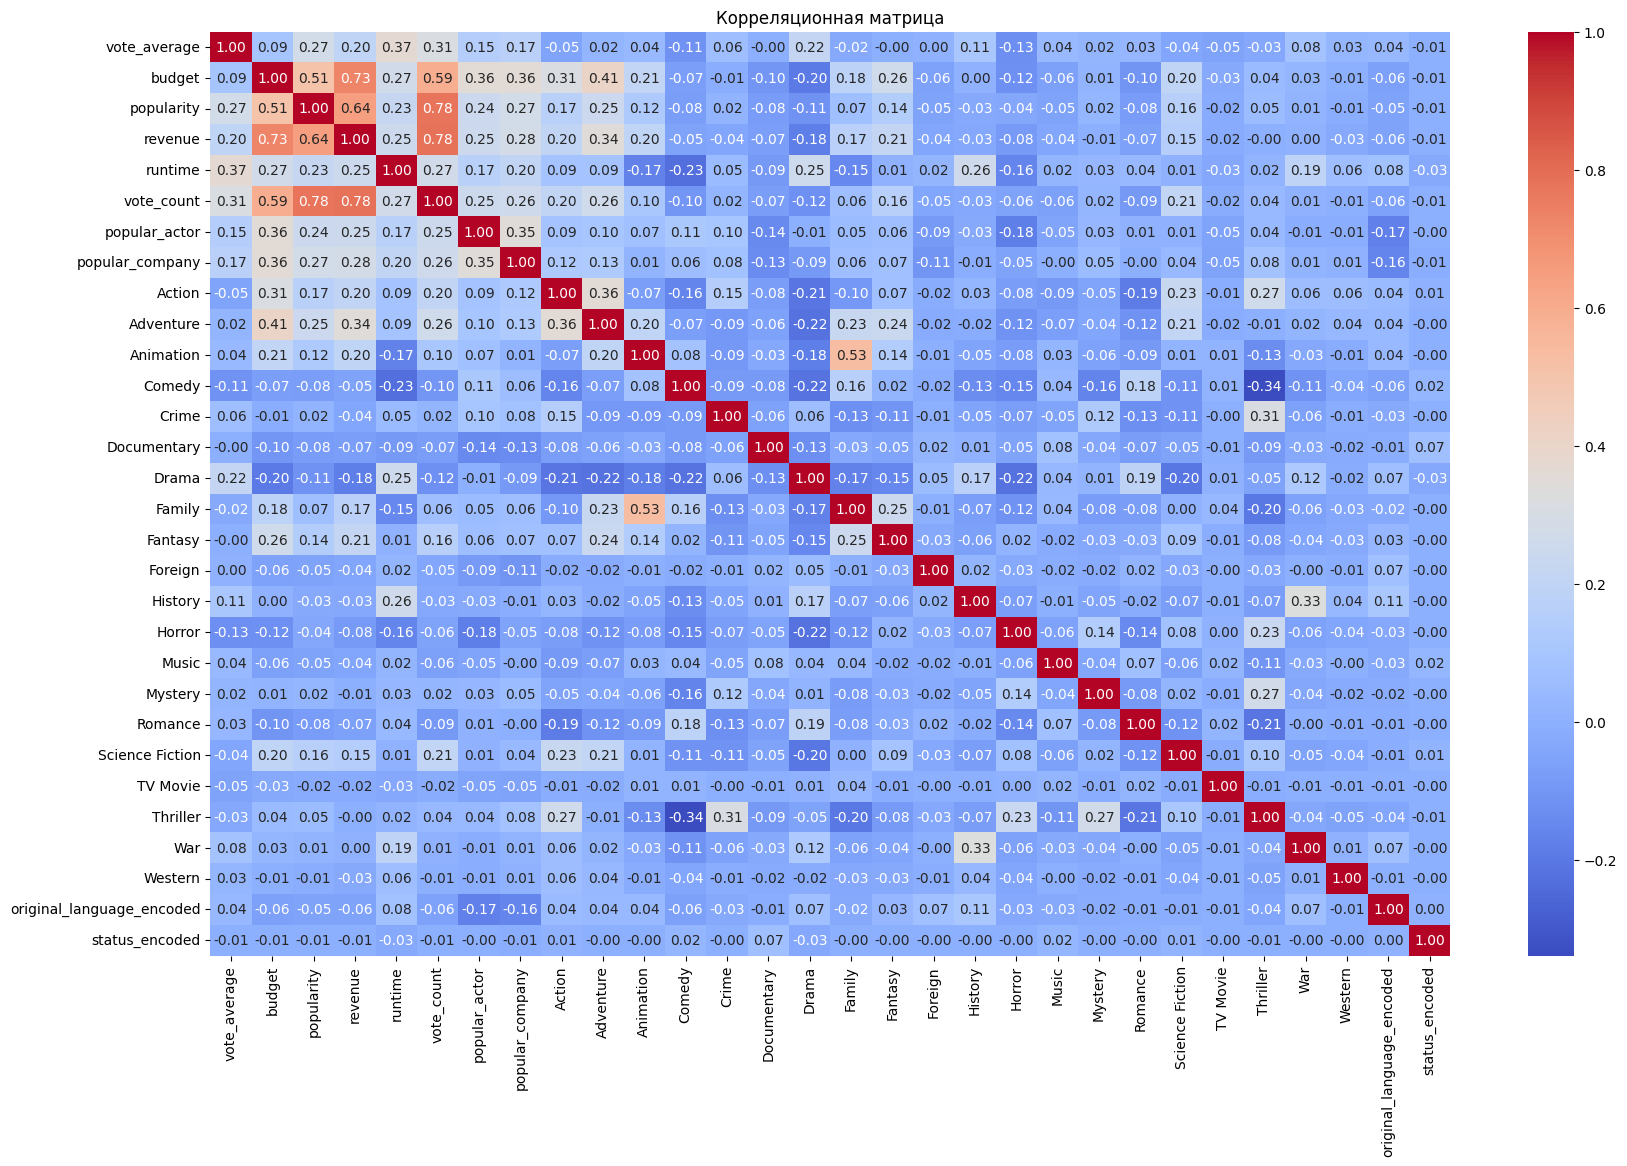

In [61]:
corr_all = data[[
    "vote_average", "budget", "popularity", "revenue", "runtime", "vote_count",
    "popular_actor", "popular_company"  # добавили эти два признака
] + list(genres_encoded.columns) + ["original_language_encoded", "status_encoded"]].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_all, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


# Анализ матрицы корреляции по датасету фильмов:
Сильная положительная корреляция между budget и revenue (0.73)
Это ожидаемо: чем выше бюджет фильма, тем выше, как правило, его сборы. Однако стоит помнить, что это не абсолютное правило — есть и малобюджетные успешные фильмы.

Положительная корреляция между popularity и vote_count (0.78), а также revenue (0.64)
Популярные фильмы, предсказуемо, собирают больше голосов и денег. Это логично: чем больше людей о фильме знает — тем выше показатели.

runtime и vote_average (0.38)
Достаточно интересный момент: более длинные фильмы получают немного выше средний рейтинг. Возможно, это связано с тем, что длинные фильмы чаще бывают более серьёзными проектами.

Корреляция между budget и vote_count (0.59)
Фильмы с высоким бюджетом привлекают больше зрителей и, соответственно, получают больше оценок.

Умеренная связь popular_actor и budget (0.36)
Чем выше бюджет, тем вероятнее участие популярных актёров.

Жанры и бюджет/популярность:

Adventure и budget (0.41) — приключенческие фильмы часто дорогостоящие.

Action и budget (0.31) — боевики тоже обычно требуют немалых затрат.

Science Fiction и budget (0.20) — фантастика обычно дороже.

Интересная отрицательная корреляция budget с жанром Romance (-0.10)
Романтические фильмы, как правило, обходятся дешевле и не требуют крупных бюджетов.

Умеренная положительная связь runtime и жанра War (0.19)
Военные фильмы чаще получаются более продолжительными.

Не очень большая связь между vote_average и popularity (0.27)
Это означает, что популярность фильма слабо говорит о его среднем рейтинге. То есть популярные фильмы не всегда лучшие по оценкам.

Минимальная связь между жанрами и vote_average
Почти все жанры имеют слабую корреляцию с рейтингами, что говорит о том, что качество (по оценке зрителей) не сильно зависит от жанра.
Тем неменее историческии фильмы в среднем получают лучшие оценки, а хорор фильм худшиие

# Выводы:
Самая сильная связь — между бюджетом и кассовыми сборами.

Популярность фильма сильно связана с количеством голосов и выручкой.

Более длинные фильмы чуть лучше оцениваются.

Фильмы с крупным бюджетом чаще привлекают популярных актёров и снимаются в популярных жанрах (приключения, боевик, фантастика).

Популярность ≠ высокий рейтинг.

Жанры почти не влияют на средний рейтинг.


Посмотрим на корелляциую с таргетной переменной

In [62]:
correlation_with_target = corr_all['popularity'].sort_values(ascending=False)
correlation_with_target

popularity                   1.000000
vote_count                   0.778114
revenue                      0.644700
budget                       0.505364
popular_company              0.274677
vote_average                 0.273990
Adventure                    0.245983
popular_actor                0.244577
runtime                      0.225398
Action                       0.166226
Science Fiction              0.163392
Fantasy                      0.143762
Animation                    0.124680
Family                       0.068545
Thriller                     0.053541
Mystery                      0.024834
Crime                        0.016576
War                          0.012562
status_encoded              -0.007367
Western                     -0.013845
TV Movie                    -0.020917
History                     -0.026079
Horror                      -0.035518
Music                       -0.052322
Foreign                     -0.053372
original_language_encoded   -0.054672
Comedy      

# Анализ корреляций с popularity

# Самые сильные корреляции:

vote_count(0.78) - Очень сильная, почти прокси для popularity. Прямое data leakage. Нужно удалить.

revenue(0.64) - Высокая связь. Поскольку кассовые сборы формируются после релиза, а в нашей задачи мы хотим создать модель которая будет пресказывать популярность до. Нужно удалить

budget(0.51) - Отличная объясняющая переменная. Оставляем.

# Умеренные корреляции:

popular_company(0.27) - Оставляем. Зависимость разумная: популярные студии чаще выпускают успешные фильмы.

vote_average(0.27) - Умеренная связь, но vote_average формируеться после выхода фильма что не подходит по смыслу задачи. Нужно удалить

Adventure(0.25) - Жанр Adventure связан с массовым прокатом. Полезная категориальная фича.

popular_actor(0.24) -	Логично: известные актёры повышают интерес. Оставляем.

runtime(0.23) - Оставляем — в совокупности с жанрами даёт эффект.

Action, Sci-Fi, Fantasy, Animation(0.12 — 0.17) - Полезные жанровые признаки.

# Низкие корреляции и отрицательные корреляции

Comedy, Romance, Drama, Horror — умеренно отрицательные. 

status_encoded — практически нулевая. Можно удалить.

Посмотрим на распределение popularity

 Видим, что распределение popularity имеет выраженное смещение вправо: большинство фильмов имеют низкую популярность, а несколько выбиваются в суперхиты. Используем boxplot, чтобы лучше убедиться в этом

Посмотрим на распределение бюджета фильмов. Учтем что в датасете, есть фильмы с 0 бюджетом, что скорее всего означает, что бюджет неизвестен. Построим графики как с 0 бюджете, так и исключив их

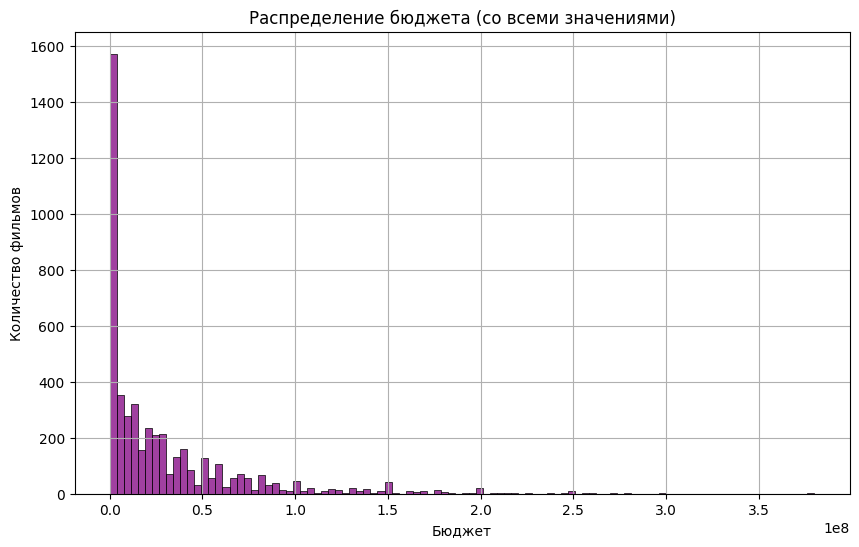

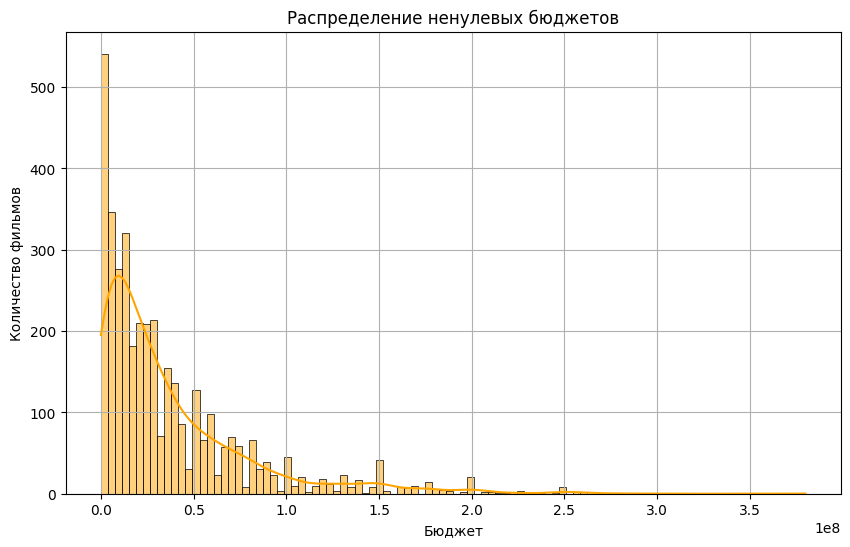

In [65]:
# График со всеми значениями
plt.figure(figsize=(10, 6))
sns.histplot(data['budget'], bins=100, kde=False, color='purple')
plt.title('Распределение бюджета (со всеми значениями)')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

# График только по ненулевым бюджетам
plt.figure(figsize=(10, 6))
sns.histplot(data.loc[data['budget'] > 0, 'budget'], bins=100, kde=True, color='orange')
plt.title('Распределение ненулевых бюджетов')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()




Проанализируем полученные данные

Даже после исключения нулевых значений, значительная доля фильмов в выборке имеет крайне малый бюджет. Это свидетельствует о наличии большого числа малобюджетных проектов в датасете.

По мере увеличения бюджета количество фильмов последовательно снижается, что характерно для подобных данных: высокобюджетных фильмов существенно меньше.

Отдельно стоит отметить наличие локальных подъёмов числа фильмов на "круглых" значениях бюджета (например, 1 млн, 1.5 млн, 2 млн долларов и т.д.). Это может указывать на то, что в исходных данных значения бюджетов были предварительно округлены до определённых стандартных сумм при сборе или загрузке датасета.

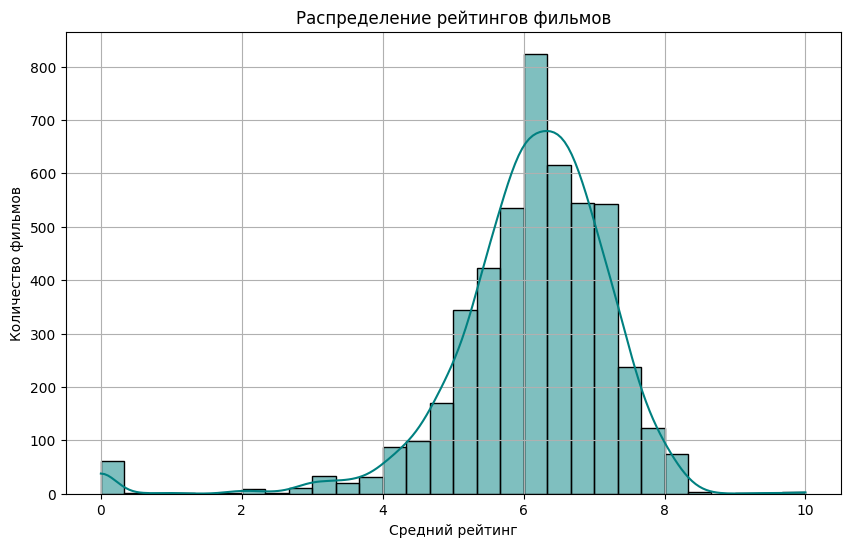

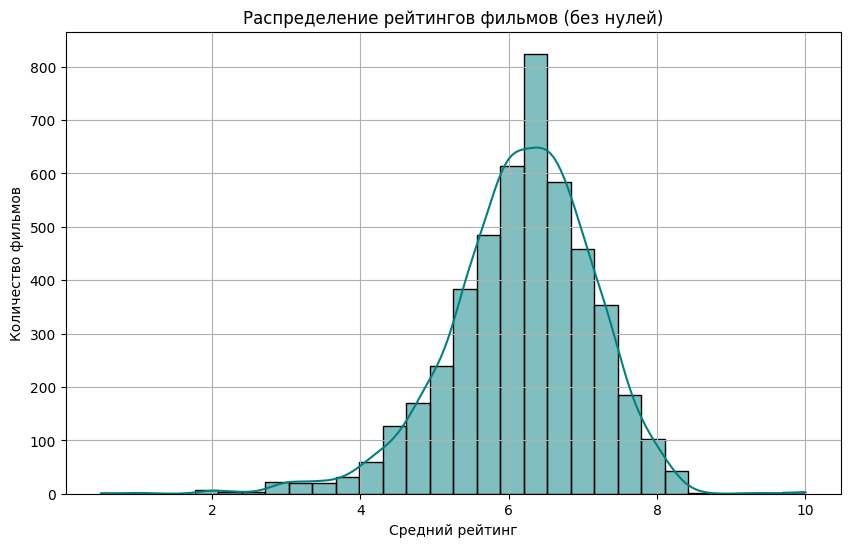

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data['vote_average'], bins=30, kde=True, color='teal')
plt.title('Распределение рейтингов фильмов')
plt.xlabel('Средний рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data.loc[data['vote_average'] > 0, 'vote_average'], bins=30, kde=True, color='teal')
plt.title('Распределение рейтингов фильмов (без нулей)')
plt.xlabel('Средний рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()


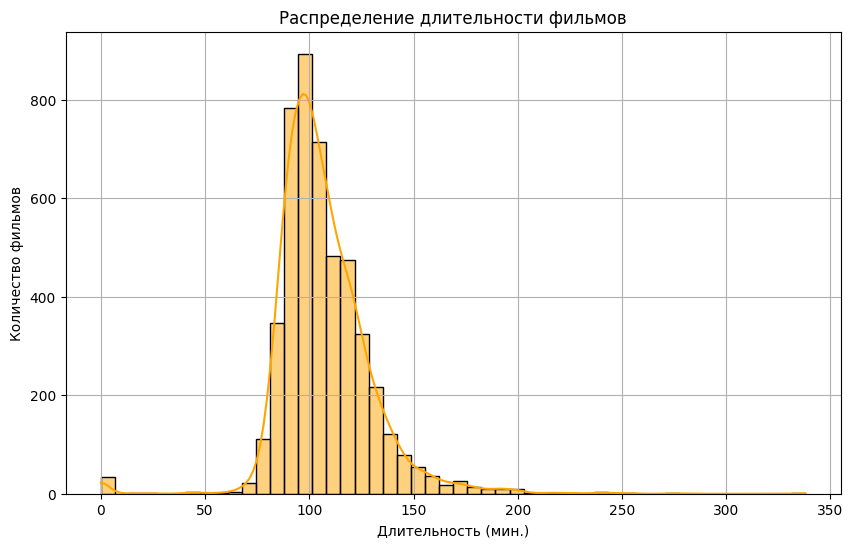

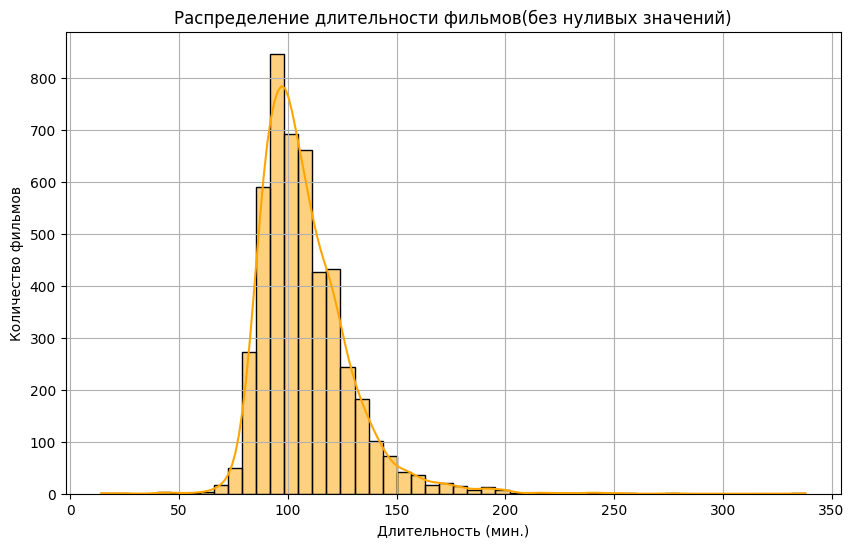

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data['runtime'], bins=50, kde=True, color='orange')
plt.title('Распределение длительности фильмов')
plt.xlabel('Длительность (мин.)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data.loc[data['runtime'] > 0, 'runtime'], bins=50, kde=True, color='orange')
plt.title('Распределение длительности фильмов(без нуливых значений)')
plt.xlabel('Длительность (мин.)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6900\2663224490.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["log_popularity"] = np.log1p(data["popularity"])  # логарифмируем для сглаживания


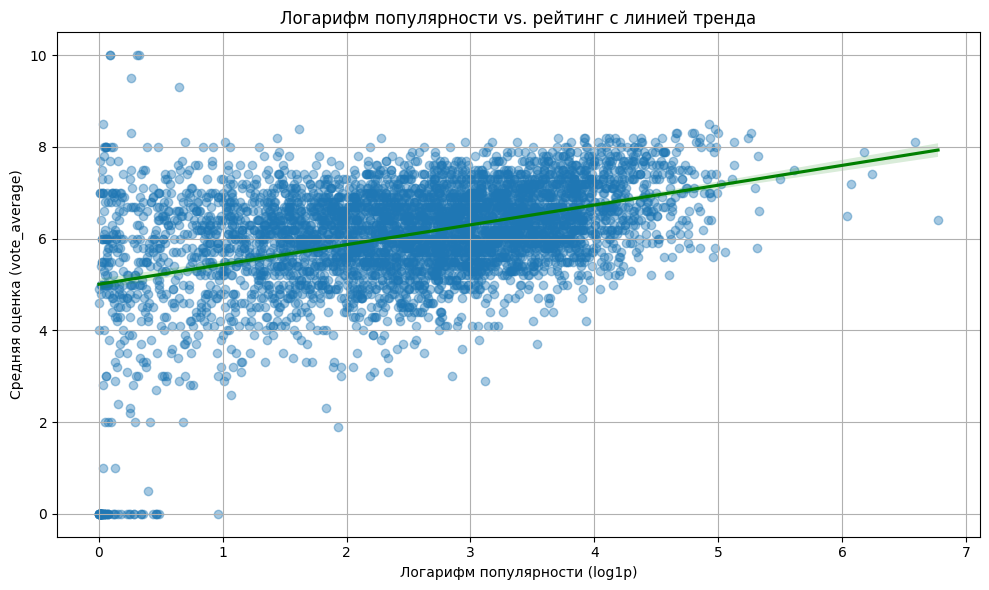

In [68]:
import numpy as np

data["log_popularity"] = np.log1p(data["popularity"])  # логарифмируем для сглаживания

plt.figure(figsize=(10, 6))
sns.regplot(
    data=data,
    x="log_popularity",
    y="vote_average",
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'green'}
)

plt.title("Логарифм популярности vs. рейтинг с линией тренда")
plt.xlabel("Логарифм популярности (log1p)")
plt.ylabel("Средняя оценка (vote_average)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Подбор и подготовка признаков
Выберем признакои которые будем использовать в модели подготовим их, создадим новые, а так же удалим ненужные
## Подготовка дата сета
После изучение дата сета мы увидели что в нем есть ряд проблемм которые необходимо исправить для корректной работы.

### Нулевые значение в дата сете
budget — 0 как пропуск, испльзуем код для замены на медианное значение по жанру, если жанр не указан используем просто медианное значение 

revenue — 0 как пропуск, признак revenue можно узнать только после проката фильма, это не подходит нам, поэтому его удаляем

runtime — 0 как пропуск, нулей не слишком много, поэтому мы можем заменить их медианными значениями

In [47]:
import ast

# удаление revenue
data.drop(columns='revenue', inplace=True)

# заменим нули в runtime на медиану
data.loc[data['runtime'] == 0, 'runtime'] = data['runtime'].median()

# Получаем основной жанр
def get_main_genre(genres):
    try:
        genres_list = ast.literal_eval(genres)
        return genres_list[0]['name'] if genres_list else 'Unknown'
    except:
        return 'Unknown'

data['main_genre'] = data['genres'].apply(get_main_genre)

# Бинарный признак наличия бюджета
data['has_budget'] = data['budget'].apply(lambda x: 0 if x == 0 else 1)

# Глобальная медиана
global_median_budget = data.loc[data['budget'] != 0, 'budget'].median()

# Медианы по жанрам (только среди фильмов с ненулевым бюджетом)
median_budget_by_genre = data.loc[data['budget'] != 0].groupby('main_genre')['budget'].median()

# Функция подстановки
def fill_budget(row):
    if row['budget'] != 0:
        return row['budget']
    genre_median = median_budget_by_genre.get(row['main_genre'])
    # Если жанр известен — берем жанровую медиану, если нет — глобальную
    return genre_median if not pd.isnull(genre_median) else global_median_budget

# Применяем
data['budget'] = data.apply(fill_budget, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_6900\2616282976.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['main_genre'] = data['genres'].apply(get_main_genre)
C:\Users\user\AppData\Local\Temp\ipykernel_6900\2616282976.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['has_budget'] = data['budget'].apply(lambda x: 0 if x == 0 else 1)


# Обучение на простой модели